# <center> Module 1 

Group: <br>
Darko Petrov <br>
Alexander Lendon

### <center> Q1. Gaussian Models.

#### 1
a)

$$
- log L(\mu, \sigma^2, X) = \frac{n}{2} log (2\pi) + \frac{n}{2} log (\sigma^2) + \frac{1}{2 \sigma^2} \sum^n_{i=1}(X_i-\mu)^2
$$

b) 

To find the maximum likelihood we need to derivate with respect to $\mu$ and $\sigma$ as shown below 
for $\mu$ 
$$
\frac{d}{d\mu} - log L(\mu, \sigma, X) = \frac{1}{2 \sigma^2} \sum^n_{i=1}2(X_i-\mu)
$$

for $\sigma^2$
$$
\frac{d}{d\sigma} - log L(\mu, \sigma, X) = \frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^n_{i=1}(X_i-\mu)^2
$$

c) For a test in a class room $\mu$ is the mean result of the students. Two factors drive this variable, the difficulty of the test and the preparedness of the students. A more diffcult test a lower mean is suited. Similarly lower preparedness of students would also suit a lower mean value.

The variance of results is denoted by $\sigma$, this indicates the spread of the results. For a difficult test or student group with diverse abilities a larger variance would be suitable. A small sigma value would be suitable for easier test and with good student preparation or similar abilities.

#### 2

a)

$$
p(y_i | x_i, \theta) = \mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2)
$$

$$
L(\theta) = -\sum_{i=1}^N \log (p(y_n|x_n,\theta)) = -\sum_{i=1}^N  \log (\mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2))
$$

$$
 = - \sum_{i=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)
$$

$$
=-\sum^N_{i=1}\log \left(e^{-\frac{-y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)-\sum^N_{i=1}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


$$
=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-\sum^N_{i=1}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


In [10]:
import pandas
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# We will be using the sklearn library. You can learn more here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# Loading the data
data0=pandas.read_csv('Real estate.csv')
npdata=data0.to_numpy()

# Divide the data to the variables and the label (price)
# The Ridge class does not admit an intercept (i.e. mu in the assignment) you should
# add a suitable column to your variables that will provide an extra parameter
# i.e. mu. Think what this column should be

# Now run ridge regression. Note that in the ridge classe mu is known as alpha.
#Setting alph=0 gives you the maximum likelihood solution. 
# You should try really large values of alpha to see the difference

# print(npdata)
X = npdata[:, :-1]  
y = npdata[:, -1]   
X = np.column_stack((np.ones(X.shape[0]), X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

alpha_values = np.linspace(1e-10,1e1,100)
ridge_models = {}
ridge_mse = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_models[alpha] = ridge_model
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)


54.60196067119501
56.28258370271321
56.91340507366476
57.19504487406719
57.35367562932614
57.455307945403874
57.525968277508426
57.577959235653154
57.61784487700841
57.64944508941745
57.67513306481508
57.696460495072486
57.71448444608654
57.72994970490429
57.74339601921698
57.75522399612011
57.76573712743373
57.77516945573302
57.783704295878636
57.79148721284442
57.79863521144928
57.80524336790268
57.81138969709712
57.81713877988029
57.822544503739074
57.82765215992525
57.83250006646197
57.837120837642665
57.84154238660715
57.845788724302594
57.84988060136305
57.85383602790138
57.85767069736545
57.861398334498794
57.86503098283944
57.868579243592364
57.872052475254954
57.875458961223664
57.87880605132687
57.882100281758554
57.88534747728486
57.888552838572636
57.891721017197824
57.894856180269905
57.8979620663159
57.90104203369759
57.90409910287269
57.907135993178116
57.91015515506798
57.91315879844785
57.91614891754568
57.91912731294245
57.922095610976044
57.92505528100682
57.92800765

C:\Users\darko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.03287e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


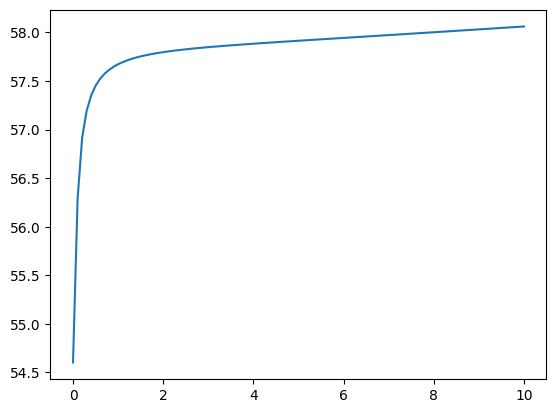

In [9]:
import matplotlib.pyplot as plt
# for a, b in zip(alpha_values, ridge_mse):
#     print("For Appha = ",a, "MSE=", b)
    
plt.plot(alpha_values,(ridge_mse))